In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

## 1. Load the raw data

In [20]:
df = pd.read_csv('../data/raw/mall_customers.csv')

In [21]:
df.rename(columns={
    'Annual Income (k$)': 'Annual_Income', 
    'Spending Score (1-100)': 'Spending_Score'
}, inplace=True)

In [22]:
df.head(5)

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.drop(columns=['CustomerID'], inplace=True)

In [24]:
df.head(5)

,Gender,Age,Annual_Income,Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [25]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [26]:
print("Data after cleaning:")
print(df.head(5))

Data after cleaning:
   Gender  Age  Annual_Income  Spending_Score
0       1   19             15              39
1       1   21             15              81
2       0   20             16               6
3       0   23             16              77
4       0   31             17              40


In [27]:
df.to_csv('mall_customers_processed.csv', index=False)
print("Saved 'mall_customers_processed.csv' successfully.")

Saved 'mall_customers_processed.csv' successfully.


In [28]:
df.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [29]:
df.duplicated().any()

np.False_

In [30]:
df.head(5)

,Gender,Age,Annual_Income,Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

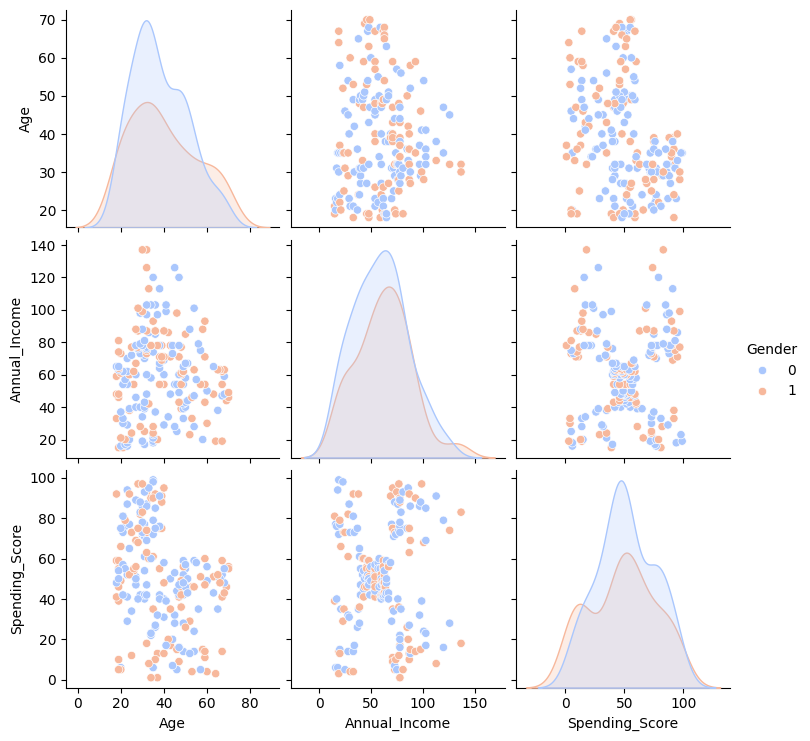

In [32]:
sns.pairplot(df, hue='Gender', palette='coolwarm')
plt.show()

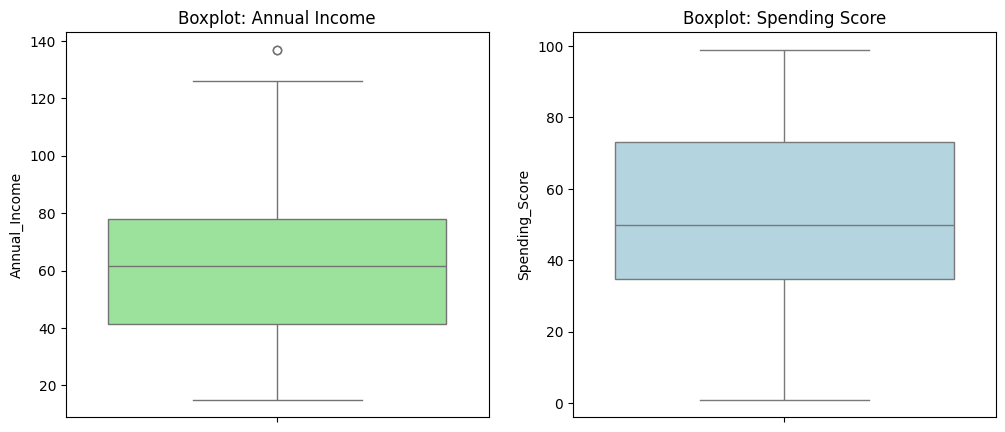

In [33]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['Annual_Income'], color='lightgreen')
plt.title('Boxplot: Annual Income')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Spending_Score'], color='lightblue')
plt.title('Boxplot: Spending Score')

plt.show()

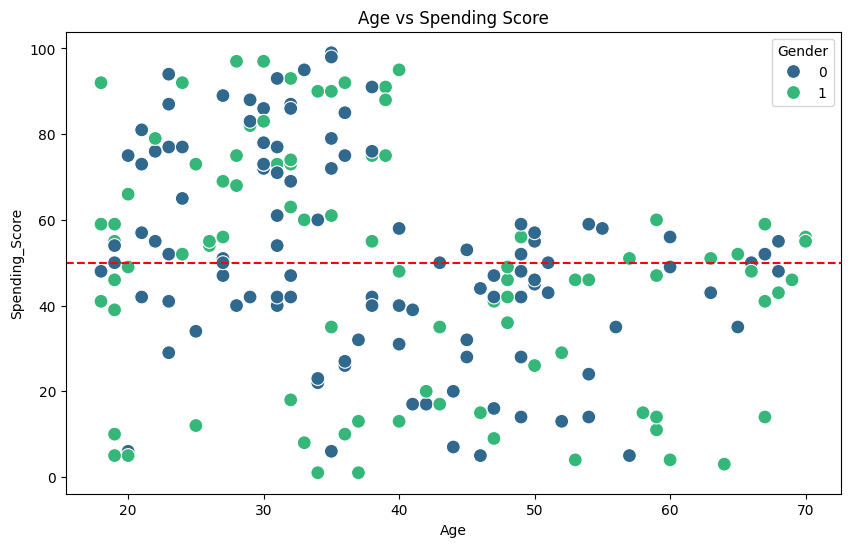

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending_Score', hue='Gender', data=df, s=100, palette='viridis')
plt.title('Age vs Spending Score')
plt.axhline(y=50, color='r', linestyle='--') # Reference line at score 50
plt.show()

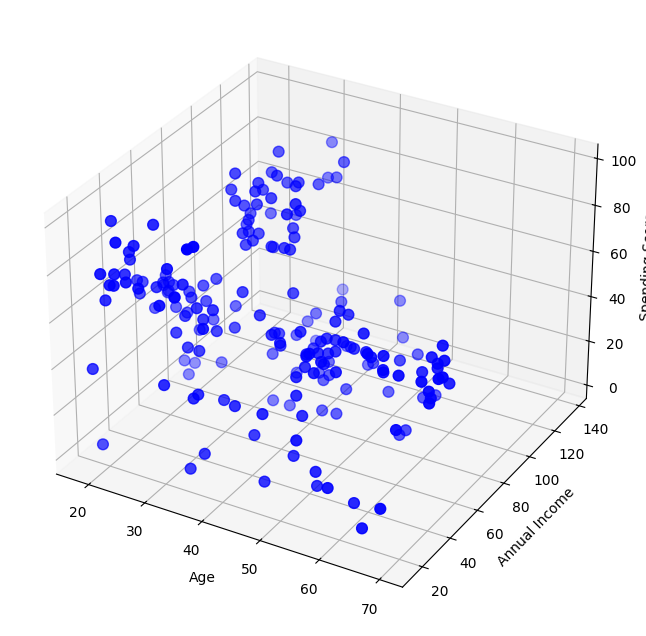

In [35]:
# This requires matplotlib 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
# Use your processed df here (Gender 0/1 is fine for coloring)
ax.scatter(df['Age'], df['Annual_Income'], df['Spending_Score'], c='blue', s=60)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.show()